In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
data = pd.read_csv("traindata/train.csv")
data_validation = pd.read_csv("validationdata/validation.csv")
data_test = pd.read_csv("testdata/test.csv")
data_validation

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel16375,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383,pixel16384
0,0,15,17,18,18,17,14,14,17,16,...,31,32,31,31,30,28,30,36,36,54
1,0,14,17,16,19,15,14,13,18,18,...,31,31,31,30,30,27,30,36,36,54
2,0,16,16,17,17,17,14,13,17,16,...,31,30,30,30,31,28,30,37,37,56
3,0,15,18,17,17,15,13,15,15,16,...,31,31,29,30,30,26,29,38,37,53
4,0,14,18,19,17,16,14,14,15,16,...,30,31,31,30,30,27,30,36,37,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,25,21,15,15,17,15,15,17,17,14,...,41,42,43,42,42,39,41,41,37,59
516,25,19,15,14,16,16,13,12,13,17,...,40,41,38,40,39,39,40,39,38,57
517,25,18,15,14,15,15,13,13,15,14,...,40,41,37,42,41,38,39,40,39,56
518,25,19,15,12,14,15,14,14,14,14,...,39,41,42,40,44,41,40,38,41,57


In [20]:
data = data.T
data_validation = data_validation.T
data_test = data_test.T
data

,0,1,2,3,4,5,6,7,8,9,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
label,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
pixel1,14,16,15,16,15,14,14,13,15,14,...,18,15,17,17,16,16,20,20,21,20
pixel2,17,17,16,17,16,16,17,19,18,18,...,16,15,17,17,16,16,16,15,14,17
pixel3,17,17,17,18,17,18,18,17,18,20,...,14,16,18,17,16,15,15,12,12,14
pixel4,16,16,17,18,17,17,16,16,17,16,...,16,17,19,17,17,15,12,12,16,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel16380,29,29,30,29,27,27,30,28,28,26,...,39,40,37,37,36,40,39,39,38,39
pixel16381,27,29,27,27,29,30,30,29,27,29,...,34,38,36,39,39,34,41,40,40,36
pixel16382,38,37,37,35,35,36,36,36,34,35,...,34,35,38,36,34,36,40,39,36,38
pixel16383,36,35,39,40,36,36,36,36,36,34,...,36,35,35,35,36,37,34,38,38,39


In [22]:
X_train = data[1:]
X_validation = data_validation[1:]
X_test = data_test[1:]
X_train = np.array(X_train.T)
X_validation = np.array(X_validation.T)
X_test = np.array(X_test.T)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1).astype("float32")
X_validation = X_validation.reshape(X_validation.shape[0], 128, 128, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1).astype("float32")
X_train /= 255
X_validation /= 255
X_test /= 255
X_train.shape

(2600, 128, 128, 1)

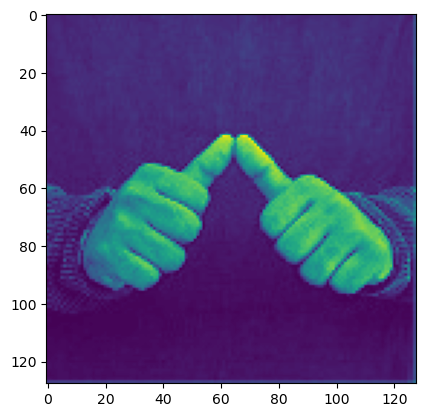

In [23]:
plt.imshow(X_train[0])
plt.show()

In [24]:
len(data_test.T['label'])

520

In [25]:
set(data.T['label'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25}

In [26]:
n_classes = 26
y_train = data.T["label"]
y_validation = data_validation.T["label"]
y_test = data_test.T["label"]
y_train = np.array(y_train)
y_validation = np.array(y_validation)
y_test = np.array(y_test)
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_validation = tf.keras.utils.to_categorical(y_validation, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

In [28]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/200


ResourceExhaustedError: in user code:

    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 997, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 579, in minimize
        return self.apply_gradients(grads_and_vars, name=name)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 695, in apply_gradients
        self._create_all_weights(var_list)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 959, in _create_all_weights
        self._create_slots(var_list)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py", line 126, in _create_slots
        self.add_slot(var, "m")
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 1050, in add_slot
        weight = tf.Variable(
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\initializers\initializers_v2.py", line 171, in __call__
        return tf.zeros(shape, dtype)

    ResourceExhaustedError: {{function_node __wrapped__Fill_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[26] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]


In [9]:
model

In [15]:
X_test[0].shape

(128, 128, 1)

In [16]:
z_predict = model.predict(X_test)
print(np.sum(z_predict.argmax(axis=1) == y_test.argmax(axis=1)) / len(y_test) * 100)
print(z_predict[0])
print(y_test[0])

6/6 [==============================] - 0s 21ms/step
100.0
[2.1441213e-08 9.9728227e-01 2.6031632e-03 1.4827135e-07 4.6977650e-08
 2.4755352e-07 1.0107353e-05 1.0275449e-04 2.2482789e-09 1.2289730e-06]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print(z_predict.argmax())
print(y_test.argmax())

202
1


In [17]:
model.save('my_model.h5')

In [1]:
from tensorflow.keras.models import load_model

In [2]:
new_model = load_model('my_model.h5')
new_model